<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/LA_weather_AAPL_ARIMA_PROPHET_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morning Lecture: ARIMA Modeling

In [8]:
import pandas as pd
import plotly.express as px

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/class%20work/LA_weather.csv')

In [11]:
df.head()

,Date,Observed,Humidity
0,2012-10-01 13:00:00,291.870000,88.0
1,2012-10-01 14:00:00,291.868186,88.0
2,2012-10-01 15:00:00,291.862844,88.0
3,2012-10-01 16:00:00,291.857503,88.0
4,2012-10-01 17:00:00,291.852162,88.0


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45099 entries, 0 to 45098
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      45099 non-null  datetime64[ns]
 1   Observed  45099 non-null  float64       
 2   Humidity  45099 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.0 MB


In [14]:
df.head()

,Date,Observed,Humidity
0,2012-10-01 13:00:00,291.870000,88.0
1,2012-10-01 14:00:00,291.868186,88.0
2,2012-10-01 15:00:00,291.862844,88.0
3,2012-10-01 16:00:00,291.857503,88.0
4,2012-10-01 17:00:00,291.852162,88.0


In [15]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none').update(layout=dict(title=dict(x=0.5)))
    
    fig.show()

In [16]:
ilinechart(df, 'Date', 'Observed')

In [19]:
model = AR(df['Observed']).fit()
df['AR'] = model.predict()

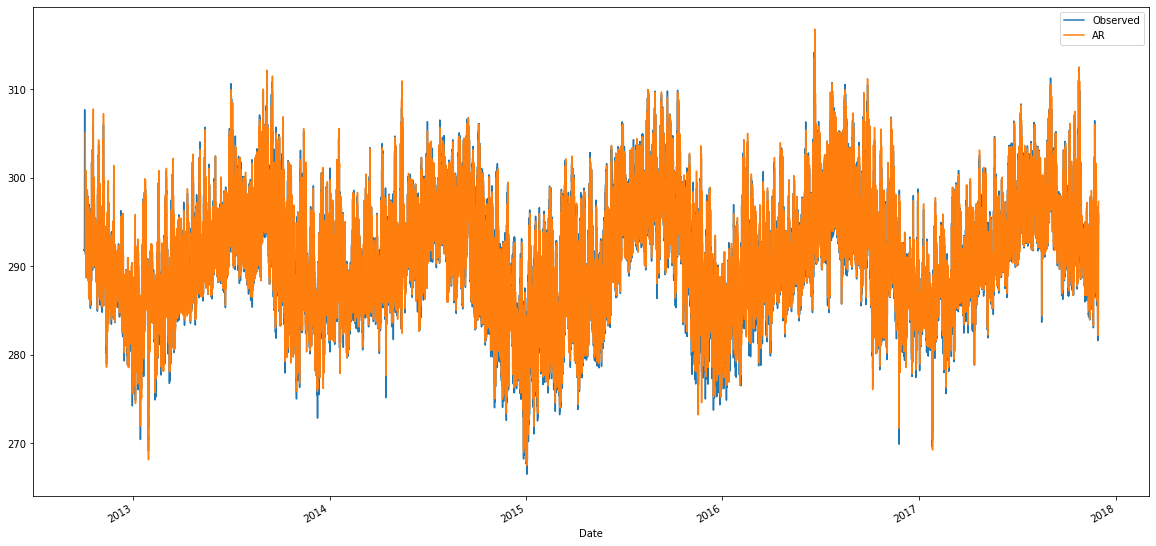

In [20]:
df.set_index('Date')[['Observed', 'AR']].plot(figsize=(20,10))

In [21]:
model = ARMA(df['Observed'], order=(0,1)).fit()
df['MA'] = model.predict()

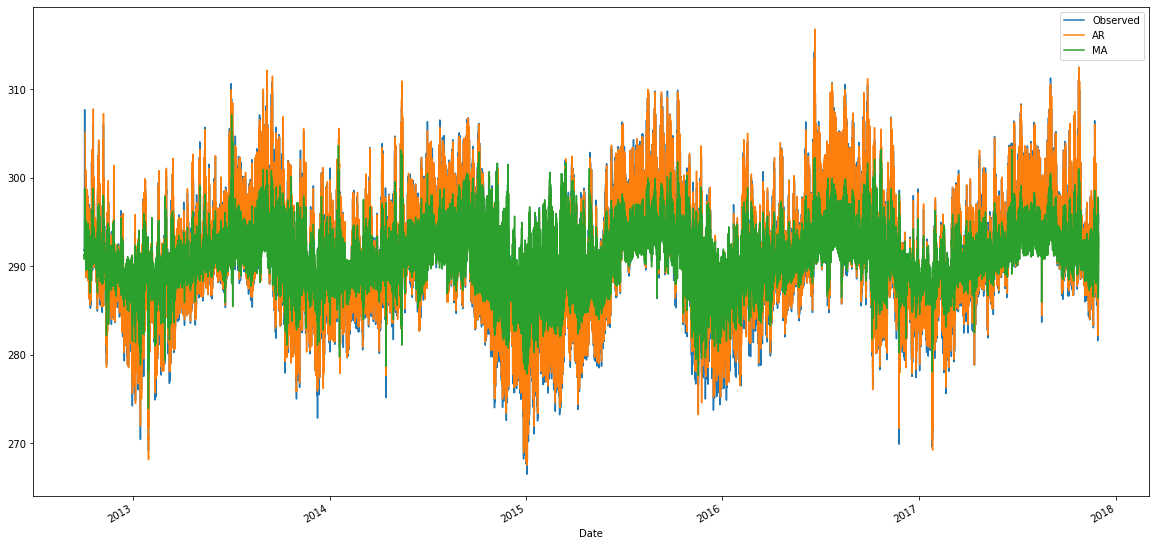

In [22]:
df.set_index('Date')[['Observed', 'AR', 'MA']].plot(figsize=(20,10))

In [23]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:               Observed   No. Observations:                45099
Model:                     ARMA(0, 1)   Log Likelihood             -124159.975
Method:                       css-mle   S.D. of innovations              3.797
Date:                Thu, 29 Oct 2020   AIC                         248325.949
Time:                        19:35:57   BIC                         248352.099
Sample:                             0   HQIC                        248334.180
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            290.8458      0.033   8873.646      0.000     290.782     290.910
ma.L1.Observed     0.8334      0.002    488.891      0.000       0.830       0.837
                                    

In [24]:
model = ARMA(df['Observed'], order=(1,1)).fit()
df['ARMA'] = model.predict()


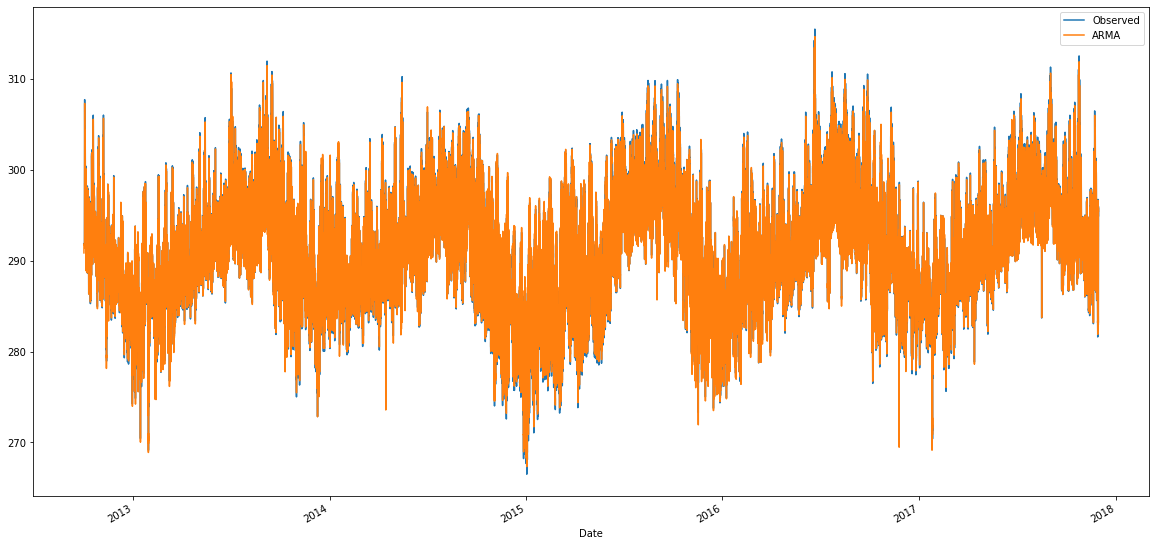

In [25]:
df.set_index('Date')[['Observed', 'ARMA']].plot(figsize=(20,10))

In [26]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:               Observed   No. Observations:                45099
Model:                     ARMA(1, 1)   Log Likelihood              -84313.740
Method:                       css-mle   S.D. of innovations              1.569
Date:                Thu, 29 Oct 2020   AIC                         168635.480
Time:                        19:36:35   BIC                         168670.346
Sample:                             0   HQIC                        168646.454
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            290.8484      0.212   1372.569      0.000     290.433     291.264
ar.L1.Observed     0.9593      0.001    708.346      0.000       0.957       0.962
ma.L1.Observed     0.1670      0.004

In [27]:
model = ARIMA(df['Observed'], order=(1,1,1)).fit()
df['ARIMA'] = model.predict(typ='levels')

In [28]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Observed   No. Observations:                45098
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -82579.656
Method:                       css-mle   S.D. of innovations              1.510
Date:                Thu, 29 Oct 2020   AIC                         165167.312
Time:                        19:37:41   BIC                         165202.179
Sample:                             1   HQIC                        165178.287
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.179e-05      0.014      0.004      0.997      -0.028       0.028
ar.L1.D.Observed     0.7541      0.005    151.741      0.000       0.744       0.764
ma.L1.D.Observed    -0.5042 

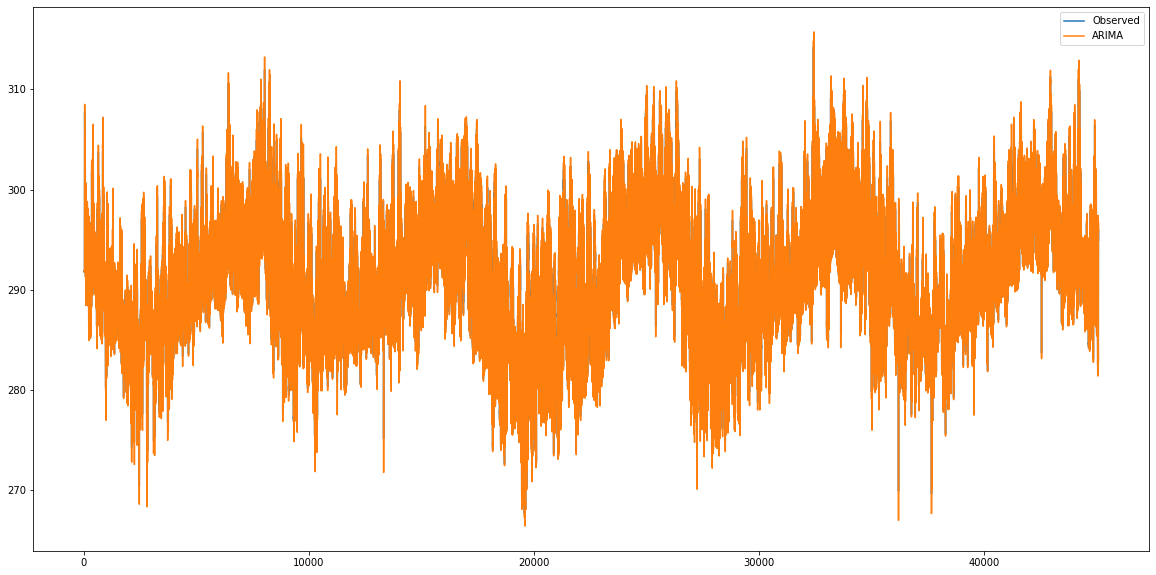

In [30]:
df[['Observed','ARIMA']].plot(figsize=(20,10))

In [31]:
model = SARIMAX(df['Observed'], order=(1,1,1), seasonal_order=(1,1,1,1)).fit()
df['SARIMA'] = model.predict()

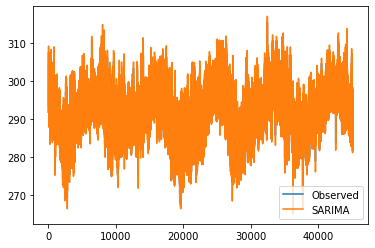

In [32]:
df.iloc[10:][['Observed','SARIMA']].plot()

In [33]:
model = SARIMAX(df['Observed'], exog=df['Humidity'], order=(1,1,1), seasonal_order=(0,0,0,0)).fit()
df['SARIMAX'] = model.predict()

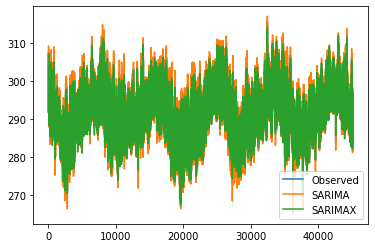

In [34]:
df.iloc[10:][['Observed','SARIMA', 'SARIMAX']].plot()

# using non-stationary data



In [35]:
aapl = pd.read_csv('https://raw.githubusercontent.com/Gaukhar-ai/for_my_Thinkful_work/master/class%20work/AAPL.csv')

In [36]:
aapl = aapl[['Date', 'Close']]

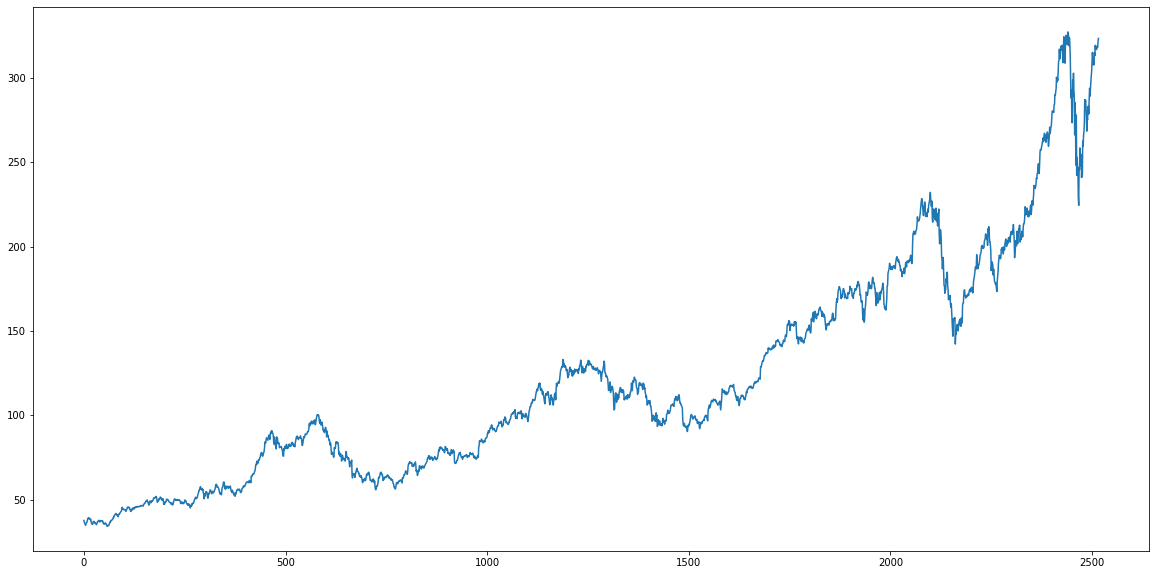

In [37]:
aapl['Close'].plot(figsize=(20,10))

In [40]:
aapl['diff'] = aapl['Close'].diff()
# aapl['Close'] - aapl['Close'].shift()
# aapl['diff'].plot(figsize=(20,10))
# aapl.head()
# aapl['Close'].pct_change().plot(figsize=(20,10))

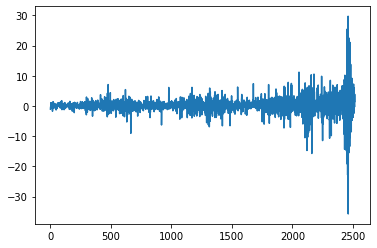

In [41]:
aapl['diff_2'] = aapl['diff'].diff()
aapl['diff'].plot()

In [42]:
model = ARIMA(aapl['Close'], order=(1,1,1)).fit()
predictions = model.predict(typ='levels')

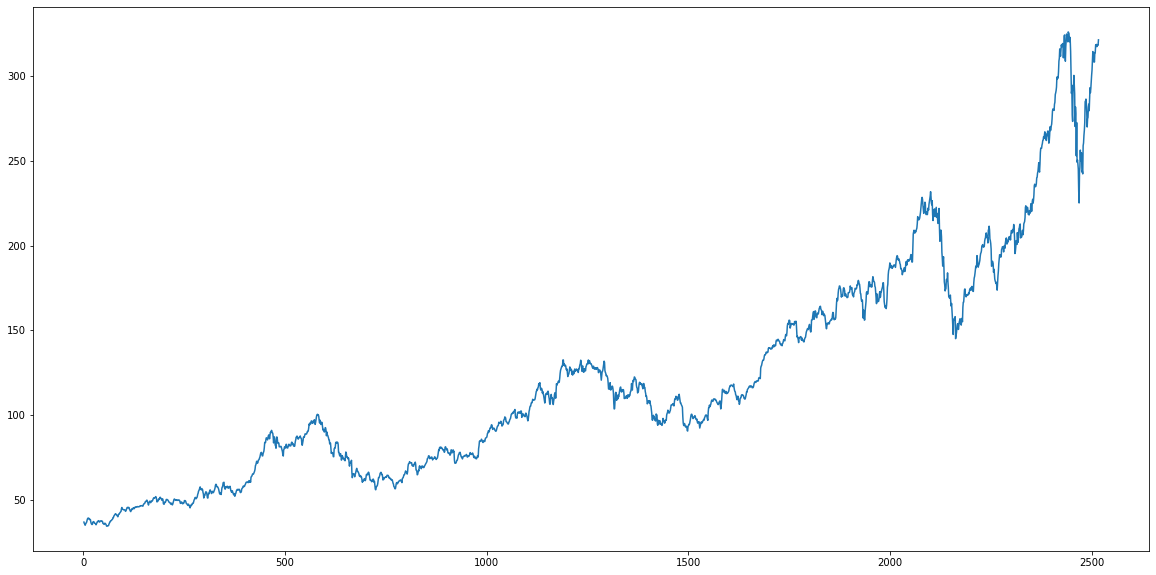

In [43]:
predictions.plot(figsize=(20,10))

# Afternoon Lecture: Time Series Forecasting

In [78]:
import statsmodels.api as sm


In [79]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name']

In [80]:
# holdout data for evaluation purposes
train = data.iloc[:-30]
test = data.iloc[-30:]

In [81]:
ilinechart(data, 'Date', 'Close')

In [82]:
series = data[['Date', 'Close']].set_index('Date')
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=252)
# Observed = Trend + Seasonality + Residuals(noise)

# components
trend = decomposition.trend.reset_index()
seasonality = decomposition.seasonal.reset_index()
residuals = decomposition.resid.reset_index()

merged = series.merge(trend, on='Date')
merged = merged.merge(seasonality, on='Date')
merged = merged.merge(residuals, on='Date')

merged.columns = ['Date', 'Observed', 'Trend', 'Seasonality', 'Residuals']

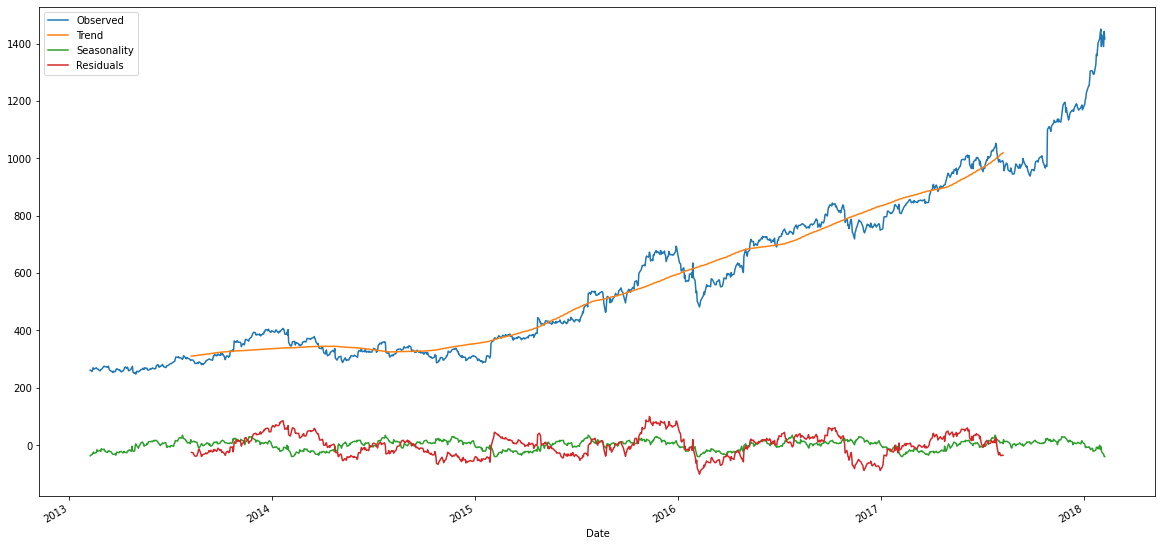

In [83]:
merged.set_index('Date').plot(figsize=(20,10))

In [85]:
merged['T+S'] = merged['Trend'] + merged['Seasonality']
merged['Total'] = merged['Trend'] + merged['Seasonality'] + merged['Residuals']


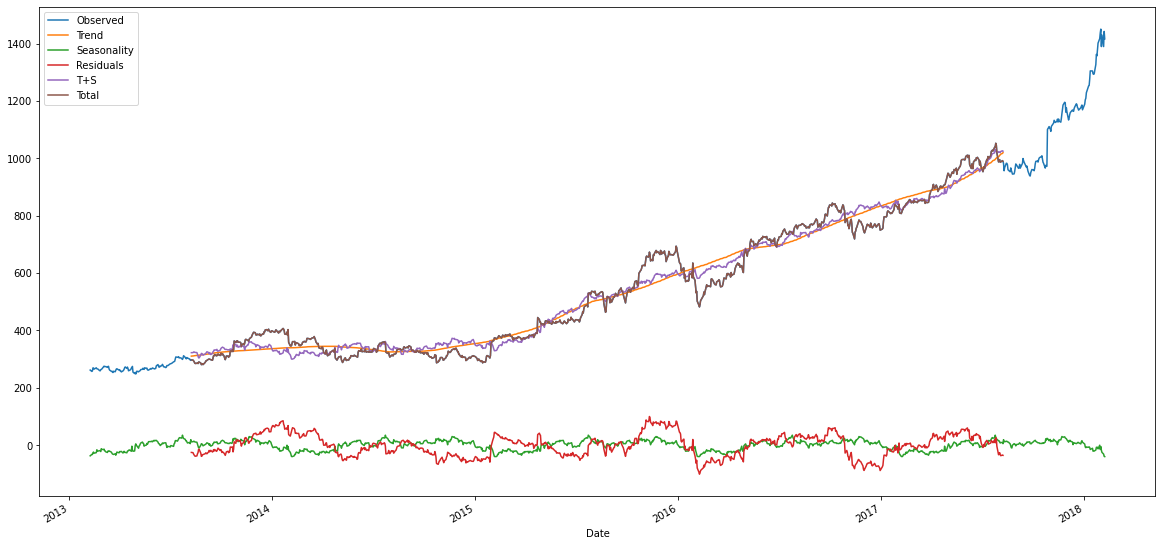

In [51]:
merged.set_index('Date').plot(figsize=(20,10))

In [86]:
melted = pd.melt(merged, id_vars='Date', value_vars=['Observed', 'Trend', 'Seasonality', 'Residuals', 'T+S', 'Total'])
melted.head()

,Date,variable,value
0,2013-02-08,Observed,261.95
1,2013-02-11,Observed,257.21
2,2013-02-12,Observed,258.70
3,2013-02-13,Observed,269.47
4,2013-02-14,Observed,269.24


In [87]:
ilinechart(melted, 'Date', 'value', groups='variable')

In [88]:
model = sm.tsa.ExponentialSmoothing(data['Close']).fit()
single_exp = model.forecast(30)

In [89]:
model = sm.tsa.ExponentialSmoothing(data['Close'], trend='additive').fit()
double_exp = model.forecast(30)

In [90]:
model = sm.tsa.ExponentialSmoothing(data['Close'], 
                                    trend='additive', 
                                    seasonal='additive', 
                                    seasonal_periods=4).fit()
triple_exp = model.forecast(30)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [91]:
def forecast(data, field, model, periods):
    model_results = model.forecast(periods)[0]
    current_value = data[field].iloc[-1]
    forecasts = []
    
    for result in model_results:
        forecast = current_value + result
        forecasts.append(forecast)
        current_value = forecast
    
    forecasts = pd.Series(forecasts)
    forecasts.index = [x + periods 
                       for x in list(data[field].tail(periods).index)]
    
    return forecasts

In [92]:
data['Shift'] = data['Close'].shift().fillna(method='bfill')
data['Diff'] = data['Close'] - data['Shift']

In [93]:
data.head()

,Date,Open,High,Low,Close,Volume,Name,Shift,Diff
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,261.95,0.00
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,261.95,-4.74
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,257.21,1.49
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,258.70,10.77
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,269.47,-0.23


In [94]:
model = ARMA(data['Diff'], order=(2,1)).fit()
arma_forecasts = forecast(data, 'Close', model, 30)
arma_forecasts

1259    1421.330867
1260    1419.611896
1261    1421.839949
1262    1422.076825
1263    1423.347968
1264    1424.084126
1265    1425.097174
1266    1425.966926
1267    1426.910837
1268    1427.816369
1269    1428.741763
1270    1429.656878
1271    1430.577313
1272    1431.494995
1273    1432.414101
1274    1433.332470
1275    1434.251221
1276    1435.169774
1277    1436.088429
1278    1437.007032
1279    1437.925662
1280    1438.844277
1281    1439.762900
1282    1440.681520
1283    1441.600141
1284    1442.518761
1285    1443.437382
1286    1444.356002
1287    1445.274623
1288    1446.193243
dtype: float64

In [95]:
model = ARIMA(data['Diff'], order=(1,1,1)).fit()
arima_forecasts = forecast(data, 'Close', model, 30)
arima_forecasts

1259    1419.337509
1260    1421.528503
1261    1423.726235
1262    1425.925898
1263    1428.127553
1264    1430.331201
1265    1432.536840
1266    1434.744472
1267    1436.954096
1268    1439.165711
1269    1441.379319
1270    1443.594918
1271    1445.812510
1272    1448.032094
1273    1450.253669
1274    1452.477237
1275    1454.702796
1276    1456.930348
1277    1459.159892
1278    1461.391427
1279    1463.624955
1280    1465.860474
1281    1468.097986
1282    1470.337490
1283    1472.578985
1284    1474.822473
1285    1477.067952
1286    1479.315424
1287    1481.564888
1288    1483.816343
dtype: float64

In [96]:
model = SARIMAX(data['Close'], order=(2,1,1), seasonal_order=(1,1,1,1)).fit()
sarima_forecasts = model.forecast(30)
sarima_forecasts

1259    1422.466897
1260    1423.417623
1261    1426.675486
1262    1429.528282
1263    1432.454299
1264    1435.287584
1265    1438.085368
1266    1440.853048
1267    1443.605133
1268    1446.348064
1269    1449.086202
1270    1451.821788
1271    1454.556065
1272    1457.289672
1273    1460.022943
1274    1462.756046
1275    1465.489065
1276    1468.222042
1277    1470.955000
1278    1473.687948
1279    1476.420891
1280    1479.153832
1281    1481.886772
1282    1484.619711
1283    1487.352650
1284    1490.085589
1285    1492.818527
1286    1495.551466
1287    1498.284405
1288    1501.017343
dtype: float64

In [97]:
series = data[['Date', 'Close']]

In [98]:
series.columns = ['ds', 'y']
series

,ds,y
0,2013-02-08,261.95
1,2013-02-11,257.21
2,2013-02-12,258.70
3,2013-02-13,269.47
4,2013-02-14,269.24
...,...,...
1254,2018-02-01,1390.00
1255,2018-02-02,1429.95
1256,2018-02-05,1390.00
1257,2018-02-06,1442.84


In [99]:
from fbprophet import Prophet

model = Prophet()
model.fit(series)

# creates future dates for forecasting
future = model.make_future_dataframe(30)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [100]:
series.tail()

,ds,y
1254,2018-02-01,1390.00
1255,2018-02-02,1429.95
1256,2018-02-05,1390.00
1257,2018-02-06,1442.84
1258,2018-02-07,1416.78


In [101]:
future.tail(30)

,ds
1259,2018-02-08
1260,2018-02-09
1261,2018-02-10
1262,2018-02-11
1263,2018-02-12
1264,2018-02-13
1265,2018-02-14
1266,2018-02-15
1267,2018-02-16
1268,2018-02-17


In [102]:
results = model.predict(future)
results.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-02-08,217.522284,223.802223,285.801199,217.522284,217.522284,37.133394,37.133394,37.133394,-7.226884,-7.226884,-7.226884,44.360278,44.360278,44.360278,0.0,0.0,0.0,254.655678
1,2013-02-11,218.506266,222.718150,282.816457,218.506266,218.506266,34.878950,34.878950,34.878950,-7.216676,-7.216676,-7.216676,42.095626,42.095626,42.095626,0.0,0.0,0.0,253.385216
2,2013-02-12,218.834260,222.815313,280.177178,218.834260,218.834260,34.394371,34.394371,34.394371,-7.153437,-7.153437,-7.153437,41.547808,41.547808,41.547808,0.0,0.0,0.0,253.228631
3,2013-02-13,219.162254,222.543828,283.469088,219.162254,219.162254,33.891245,33.891245,33.891245,-7.234239,-7.234239,-7.234239,41.125484,41.125484,41.125484,0.0,0.0,0.0,253.053499
4,2013-02-14,219.490248,221.360096,281.713304,219.490248,219.490248,33.260337,33.260337,33.260337,-7.575893,-7.575893,-7.575893,40.836230,40.836230,40.836230,0.0,0.0,0.0,252.750585


In [103]:
results.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1259,2018-02-08,1275.659831,1284.469177,1345.304180,1275.659831,1275.659831,37.005017,37.005017,37.005017,-7.575893,-7.575893,-7.575893,44.580910,44.580910,44.580910,0.0,0.0,0.0,1312.664848
1260,2018-02-09,1277.005720,1283.720992,1342.854757,1277.005720,1277.005720,36.495286,36.495286,36.495286,-7.226884,-7.226884,-7.226884,43.722170,43.722170,43.722170,0.0,0.0,0.0,1313.501006
1261,2018-02-10,1278.351608,1308.518274,1367.696509,1278.351608,1278.351608,61.142719,61.142719,61.142719,18.203565,18.203565,18.203565,42.939154,42.939154,42.939154,0.0,0.0,0.0,1339.494327
1262,2018-02-11,1279.697497,1309.134898,1369.429162,1279.697497,1279.697497,60.454499,60.454499,60.454499,18.203565,18.203565,18.203565,42.250934,42.250934,42.250934,0.0,0.0,0.0,1340.151995
1263,2018-02-12,1281.043385,1287.459291,1347.483832,1281.043385,1281.043385,34.456703,34.456703,34.456703,-7.216676,-7.216676,-7.216676,41.673379,41.673379,41.673379,0.0,0.0,0.0,1315.500088
1264,2018-02-13,1282.389274,1284.701097,1346.128560,1282.389274,1282.389274,34.065381,34.065381,34.065381,-7.153437,-7.153437,-7.153437,41.218819,41.218819,41.218819,0.0,0.0,0.0,1316.454655
1265,2018-02-14,1283.735163,1287.363304,1347.325098,1283.735163,1283.735163,33.661563,33.661563,33.661563,-7.234239,-7.234239,-7.234239,40.895802,40.895802,40.895802,0.0,0.0,0.0,1317.396726
1266,2018-02-15,1285.081051,1287.452929,1348.151519,1285.081051,1285.081051,33.133059,33.133059,33.133059,-7.575893,-7.575893,-7.575893,40.708952,40.708952,40.708952,0.0,0.0,0.0,1318.214110
1267,2018-02-16,1286.426940,1291.012201,1349.528609,1286.426940,1286.426940,33.432038,33.432038,33.432038,-7.226884,-7.226884,-7.226884,40.658923,40.658923,40.658923,0.0,0.0,0.0,1319.858978
1268,2018-02-17,1287.772828,1316.210319,1376.142573,1287.772828,1287.772828,58.946017,58.946017,58.946017,18.203565,18.203565,18.203565,40.742452,40.742452,40.742452,0.0,0.0,0.0,1346.718846


In [104]:
prophet_forecasts = results.iloc[-30:]['yhat']
prophet_forecasts

1259    1312.664848
1260    1313.501006
1261    1339.494327
1262    1340.151995
1263    1315.500088
1264    1316.454655
1265    1317.396726
1266    1318.214110
1267    1319.858978
1268    1346.718846
1269    1348.274795
1270    1324.526494
1271    1326.363929
1272    1328.143065
1273    1329.728262
1274    1332.050417
1275    1359.478461
1276    1361.478004
1277    1338.036699
1278    1340.036232
1279    1341.828131
1280    1343.276234
1281    1345.314785
1282    1372.319779
1283    1373.767368
1284    1349.658899
1285    1350.892500
1286    1351.838419
1287    1352.380979
1288    1353.476117
Name: yhat, dtype: float64

In [105]:
future_dates = pd.DataFrame({'Date': pd.date_range(start=data.Date.iloc[-1], periods=31, 
                                                   freq='D', closed='right')})

In [106]:
# adds in the 30 extra rows of dates
fcast_df = pd.concat([pd.DataFrame(data['Date']), future_dates], ignore_index=True)
fcast_df

,Date
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
...,...
1284,2018-03-05
1285,2018-03-06
1286,2018-03-07
1287,2018-03-08


In [107]:
fcast_df = fcast_df.merge(data[['Date', 'Close']], on='Date', how='left')

In [108]:
fcast_df['Double_Exp_Smooth'] = double_exp
fcast_df['Triple_Exp_Smooth'] = triple_exp
fcast_df['ARMA'] = arma_forecasts
fcast_df['ARIMA'] = arima_forecasts
fcast_df['SARIMA'] = sarima_forecasts
fcast_df['Prophet'] = prophet_forecasts

In [109]:
fcast_df.tail(30)

,Date,Close,Double_Exp_Smooth,Triple_Exp_Smooth,ARMA,ARIMA,SARIMA,Prophet
1259,2018-02-08,NaN,1417.911707,1426.081307,1421.330867,1419.337509,1422.466897,1312.664848
1260,2018-02-09,NaN,1418.829428,1427.591348,1419.611896,1421.528503,1423.417623,1313.501006
1261,2018-02-10,NaN,1419.747148,1443.736132,1421.839949,1423.726235,1426.675486,1339.494327
1262,2018-02-11,NaN,1420.664868,1443.042414,1422.076825,1425.925898,1429.528282,1340.151995
1263,2018-02-12,NaN,1421.582589,1450.940495,1423.347968,1428.127553,1432.454299,1315.500088
1264,2018-02-13,NaN,1422.500309,1452.450536,1424.084126,1430.331201,1435.287584,1316.454655
1265,2018-02-14,NaN,1423.418029,1468.595321,1425.097174,1432.536840,1438.085368,1317.396726
1266,2018-02-15,NaN,1424.335750,1467.901603,1425.966926,1434.744472,1440.853048,1318.214110
1267,2018-02-16,NaN,1425.253470,1475.799684,1426.910837,1436.954096,1443.605133,1319.858978
1268,2018-02-17,NaN,1426.171190,1477.309725,1427.816369,1439.165711,1446.348064,1346.718846


In [110]:
melted = pd.melt(fcast_df, id_vars='Date', var_name='Variable', value_name='Value', 
                 value_vars=list(fcast_df.columns)[1:])

ilinechart(melted, 'Date', 'Value', groups='Variable', 
                title='Forecast Comparison')